In [3]:
#!/usr/bin/env python
# coding: utf-8

# In[6]:
import os
import subprocess
import numpy as np
from dezero import as_variable
from dezero import Variable

def _dot_var(v, verbose=False): # underbar in the function name indicates that the function is only used locally(inside another function)
    dot_var='{} [label="{}", color=orange, style=filled]\n'
    
    name='' if v.name is None else v.name
    if verbose and v.data is not None:
        if v.name is not None:
            name+=':'
        name+= str(v.shape)+' '+str(v.dtype)
    return dot_var.format(id(v),name)
            
def _dot_func(f):
    dot_func='{} [label="{}", color=lightblue, style=filled, shape=box]\n'
    txt= dot_func.format(id(f), f.__class__.__name__)
    
    dot_edge='{}->{}\n'
    for x in f.inputs:
        txt+=dot_edge.format(id(x), id(f))
    for y in f.outputs:
        txt+=dot_edge.format(id(f), id(y()))
    return txt
        
def get_dot_graph(output, verbose=True):
    txt=''
    funcs=[]
    seen_set=set()
    
    def add_func(f):
        if f not in seen_set:
            funcs.append(f)
            seen_set.add(f)
    add_func(output.creator)
    txt+=_dot_var(output, verbose)
    
    while funcs:
        func=funcs.pop()
        txt==_dot_func(func)
        for x in func.inputs:
            txt+=_dot_var(x,verbose)
            
            if x.creator is not None:
                add_func(x.creator)
    return 'digraph g {\n' + txt + '}'

def plot_dot_graph(output, verbose=True, to_file='graph.png'):
    dot_graph=get_dot_graph(output, verbose)
    
    tmp_dir=os.path.join(os.path.expanduser('~'), '.dezero')
    if not os.path.exists(tmp_dir):
        os.mkdir(tmp_dir)
    graph_path=os.path.join(tmp_dir, 'tmp_graph.dot')
    
    with open(graph_path, 'w') as f:
        f.write(dot_graph)
    
    extension=os.path.splitext(to_file)[1][1:]
    cmd='dot {} -T {} -o {}'.format(graph_path, extension, to_file)
    subprocess.run(cmd, shell=True)

    
    try:
        from IPython import display
        return display.Image(filename=to_file)
    except:
        pass
# In[7]:




# In[ ]:






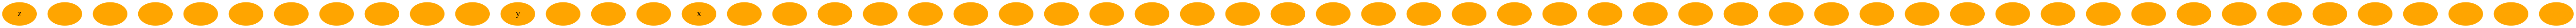

In [4]:
def goldstein(x,y):
    z= (1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2))*\
    (30 + (2*x - 3*y) ** 2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))
    return z

x=Variable(np.array(1.0))
y=Variable(np.array(1.0))
z=goldstein(x,y)
z.backward()

x.name='x'
y.name='y'
z.name='z'
plot_dot_graph(z, verbose=False, to_file='goldstein.png')